In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp39-cp39-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.2.1-cp39-cp39-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv('realistic_ocean_climate_dataset.csv')

In [4]:
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [5]:
df.describe()

,Latitude,Longitude,SST (°C),pH Level,Species Observed
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.728440,11.930638,28.537200,8.049872,120.472000
std,13.534648,108.174778,1.425076,0.055707,20.475441
min,-18.383000,-155.717600,23.640000,7.872000,54.000000
25%,-0.932925,-90.926400,27.530000,8.011000,107.750000
50%,10.018750,38.520000,28.515000,8.052000,120.000000
75%,19.891000,114.990975,29.452500,8.085250,133.250000
max,20.122000,147.827100,33.210000,8.195000,171.000000


In [6]:
df.isnull().sum()

Date                    0
Location                0
Latitude                0
Longitude               0
SST (°C)                0
pH Level                0
Bleaching Severity    150
Species Observed        0
Marine Heatwave         0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

d:\sympo project\NM2\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


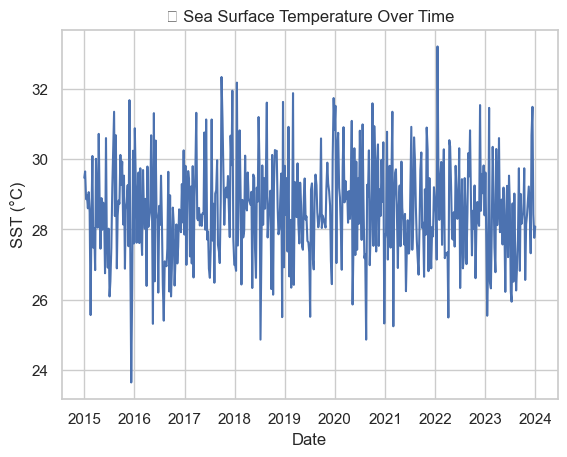

In [9]:
sns.lineplot(x='Date', y='SST (°C)', data=df)
plt.title('📈 Sea Surface Temperature Over Time')
plt.ylabel('SST (°C)')
plt.show()


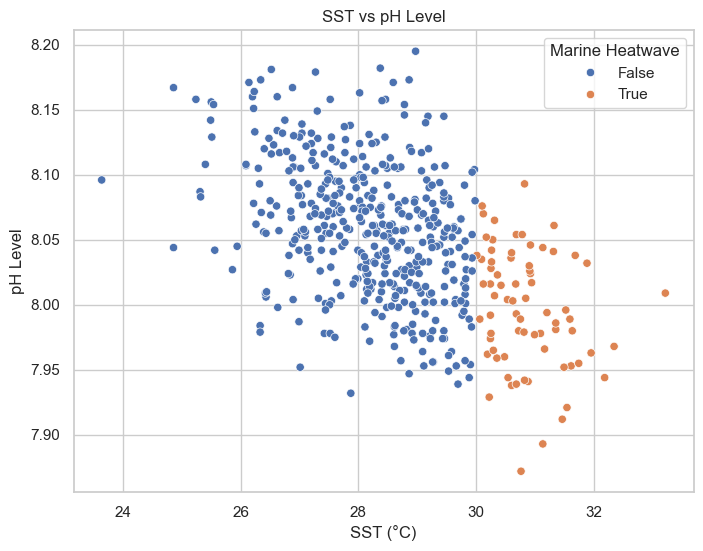

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SST (°C)', y='pH Level', hue='Marine Heatwave')
plt.title('SST vs pH Level')
plt.show()

C:\Users\prane\AppData\Local\Temp\ipykernel_19584\602790847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heatwave_counts.values, y=heatwave_counts.index, palette='Reds')


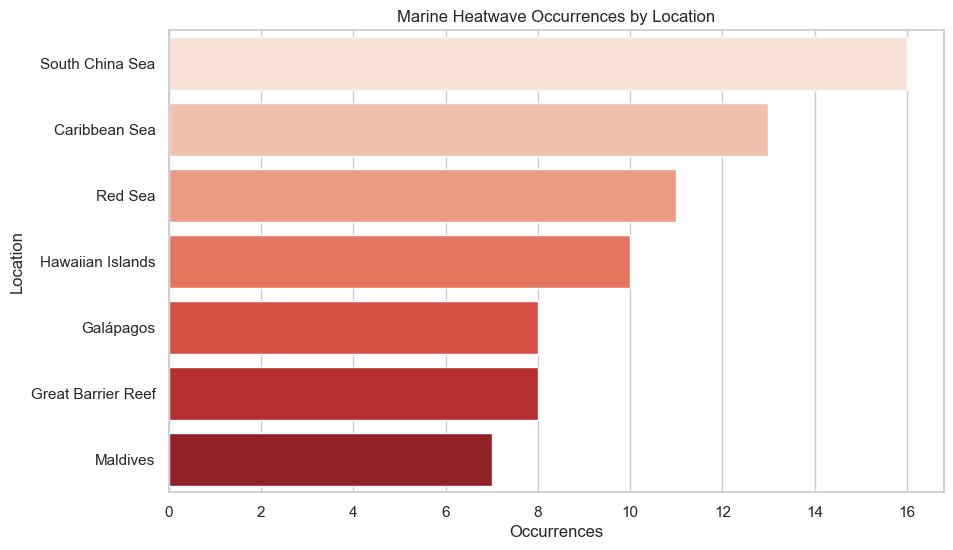

In [11]:
plt.figure(figsize=(10, 6))
heatwave_counts = df[df['Marine Heatwave'] == True]['Location'].value_counts()
sns.barplot(x=heatwave_counts.values, y=heatwave_counts.index, palette='Reds')
plt.title('Marine Heatwave Occurrences by Location')
plt.xlabel('Occurrences')
plt.show()


C:\Users\prane\AppData\Local\Temp\ipykernel_19584\2936493890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bleaching Severity', data=df, palette='coolwarm')


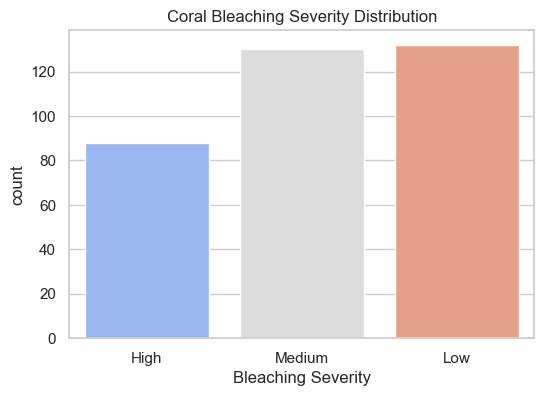

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Bleaching Severity', data=df, palette='coolwarm')
plt.title('Coral Bleaching Severity Distribution')
plt.show()

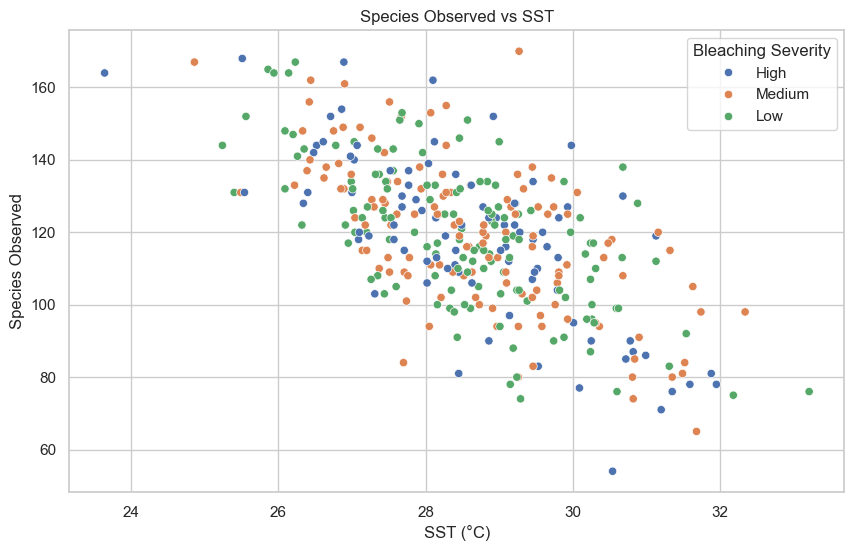

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SST (°C)', y='Species Observed', hue='Bleaching Severity')
plt.title('Species Observed vs SST')
plt.show()

In [14]:
top_sst = df.groupby('Location')['SST (°C)'].mean().sort_values(ascending=False).head(5)
print("📍 Locations with highest avg SST:\n", top_sst)

📍 Locations with highest avg SST:
 Location
South China Sea       28.866986
Caribbean Sea         28.681143
Maldives              28.543333
Great Barrier Reef    28.469195
Hawaiian Islands      28.424085
Name: SST (°C), dtype: float64


In [15]:
X = df[['SST (°C)', 'pH Level', 'Species Observed']]  # Features
y = df['Bleaching Severity']  # Target

In [16]:
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

C:\Users\prane\AppData\Local\Temp\ipykernel_19584\998304229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [17]:
y = y.astype('category').cat.codes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
ml_model = LogisticRegression()
ml_model.fit(X_train_scaled, y_train)
y_pred_ml = ml_model.predict(X_test_scaled)

In [21]:
print("Machine Learning (Logistic Regression) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ml)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ml))
print("Classification Report:\n", classification_report(y_test, y_pred_ml))


Machine Learning (Logistic Regression) Results:
Accuracy: 0.56
Confusion Matrix:
 [[ 0 16  0]
 [ 0 56  0]
 [ 0 28  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.56      1.00      0.72        56
           2       0.00      0.00      0.00        28

    accuracy                           0.56       100
   macro avg       0.19      0.33      0.24       100
weighted avg       0.31      0.56      0.40       100



d:\sympo project\NM2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\sympo project\NM2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\sympo project\NM2\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
dl_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


d:\sympo project\NM2\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
dl_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3091 - loss: 0.7511
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5826 - loss: 0.5162 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5386 - loss: 0.3506 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6090 - loss: 0.1993 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5830 - loss: 0.0091  
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5665 - loss: -0.1326 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5924 - loss: -0.2002 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5306 - loss: -0.2822 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5310 - loss: -0.4295 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5821 - loss: -0.3519


In [24]:
_, accuracy_dl = dl_model.evaluate(X_test_scaled, y_test)
print(f"Deep Learning Model Accuracy: {accuracy_dl}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5719 - loss: -0.6077 
Deep Learning Model Accuracy: 0.5600000023841858


In [25]:
print("""
Key Insights:
- Warmer sea surface temperatures correlate with lower pH values (ocean acidification).
- High bleaching severity is more common during marine heatwaves.
- Species diversity tends to decrease when SST is very high or bleaching severity increases.
""")


Key Insights:
- Warmer sea surface temperatures correlate with lower pH values (ocean acidification).
- High bleaching severity is more common during marine heatwaves.
- Species diversity tends to decrease when SST is very high or bleaching severity increases.

